<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/Blublublu/library_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project: Compare Big Data using DASK**
## Assignment 7: Comparison between libraries


**Group Name: Blublublu**

|Name|Matric No.|
|----------|------|
|ANG YI QIN |A21EC0163|
|LAU YEE CHI |A21EC0042|
|SOO WAN YING |A21EC0227|
|LIEW YVONNE |A21EC0045|


# Airline Delay Analysis

**Dataset used**: [Airline Delay Analysis](https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis)

- The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. I came across this useful data from DOT's database at working and figured this would be a really helpful dataset: Summary information on the number of on-time, delayed, canceled, and diverted flight.
- The datasets contain daily airline information covering from flight information, carrier company, to taxing-in, taxing-out time, and generalized delay reason of exactly 10 years, from 2009 to 2019. The DOT's database is renewed from 2018, so there might be a minor change in the column names. In this assignment, we use dataset of flight information in **2018** to do EDA and visualization.
-The flight delay and cancellation data were collected and managed by the DOT's Bureau of Transportation Statistics, only included data related to time-analysis on each flight.

## Downloading the Dataset


To access datasets needed in Kaggle, we use the Kaggle API along with a JSON token. The Kaggle API allows us to interact with Kaggle resources, directly from the command line or through scripts.
After generating Kaggle API token in Kaggle account, we upload and keep the downloaded `'kaggle.json'` file in a secure location on the machine.


In [1]:
!pip install opendatasets

In [2]:
!pip install "dask[complete]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.7 MB/s eta 0:00:00


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
import dask.dataframe as dd
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis")

# Specify the file path
file_path = "/content/airline-delay-analysis/airline delay analysis/2018.csv"

# Specify dtype for the problematic column
dtype_spec = {'CANCELLATION_CODE': 'object'}

# Read the CSV file with dtype specification
ddf = dd.read_csv(file_path, dtype=dtype_spec)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: angyiqin
Your Kaggle Key: ··········


100%|██████████| 2.19G/2.19G [00:23<00:00, 101MB/s]


In [4]:
%%time
ddf.dtypes

CPU times: user 338 µs, sys: 0 ns, total: 338 µs
Wall time: 347 µs


FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

The dataset has been downloaded and extracted.

In [5]:
%%time
# Select the first 10 rows
first_10_rows = ddf.head(10)

# Display the result
print(first_10_rows)

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-01-01         UA               2429    EWR  DEN          1517   
1  2018-01-01         UA               2427    LAS  SFO          1115   
2  2018-01-01         UA               2426    SNA  DEN          1335   
3  2018-01-01         UA               2425    RSW  ORD          1546   
4  2018-01-01         UA               2424    ORD  ALB           630   
5  2018-01-01         UA               2422    ORD  OMA          2241   
6  2018-01-01         UA               2421    IAH  LAS           750   
7  2018-01-01         UA               2420    DEN  CID          1324   
8  2018-01-01         UA               2419    SMF  EWR          2224   
9  2018-01-01         UA               2418    RIC  DEN          1601   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1512.0       -5.0      15.0      1527.0  ...             268.0   
1    1107.0       -8.0      11.0      1118.0  ...     

In [6]:
%%time
ddf.describe().compute()

/usr/local/lib/python3.10/dist-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


CPU times: user 47.8 s, sys: 7.06 s, total: 54.9 s
Wall time: 47.2 s


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7.213446e+06,7.213446e+06,7.101129e+06,7.096212e+06,7.097616e+06,7.097617e+06,7.094200e+06,7.094200e+06,7.213446e+06,7.094201e+06,...,7.213436e+06,7.079004e+06,7.079004e+06,7.213446e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,0.0
mean,2.607531e+03,1.329687e+03,1.333854e+03,9.969858e+00,1.741061e+01,1.357799e+03,1.462162e+03,7.601246e+00,1.486341e+03,1.466784e+03,...,1.411356e+02,1.364999e+02,1.115020e+02,7.999895e+02,1.945501e+01,3.636459e+00,1.588547e+01,9.353890e-02,2.564412e+01,NaN
std,1.860122e+03,4.909320e+02,5.045055e+02,4.482964e+01,9.920409e+00,5.059721e+02,5.334675e+02,6.064797e+00,5.183124e+02,5.377089e+02,...,7.334433e+01,7.313758e+01,7.111293e+01,5.981783e+02,5.890812e+01,2.999601e+01,3.589350e+01,3.174306e+00,4.978776e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.151000e+03,9.150000e+02,9.220000e+02,-5.000000e+00,1.200000e+01,9.390000e+02,1.059000e+03,4.000000e+00,1.110000e+03,1.104000e+03,...,9.000000e+01,8.500000e+01,6.100000e+01,3.700000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2.427000e+03,1.325000e+03,1.331000e+03,-1.000000e+00,1.500000e+01,1.344000e+03,1.514000e+03,6.000000e+00,1.522000e+03,1.518000e+03,...,1.250000e+02,1.210000e+02,9.500000e+01,6.460000e+02,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,8.000000e+00,NaN
75%,4.425000e+03,1.743000e+03,1.756000e+03,1.600000e+01,2.100000e+01,1.811000e+03,1.913000e+03,9.000000e+00,1.920000e+03,1.919000e+03,...,1.750000e+02,1.700000e+02,1.440000e+02,1.050000e+03,1.900000e+01,0.000000e+00,2.200000e+01,0.000000e+00,3.900000e+01,NaN
max,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,...,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,NaN


Next step

In [7]:
%%time
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 28 entries, FL_DATE to Unnamed: 27
dtypes: object(5), float64(20), int64(3)CPU times: user 1.82 ms, sys: 956 µs, total: 2.77 ms
Wall time: 3.85 ms


In [8]:
%%time
# Check missing data
ddf.isna().sum().compute()

CPU times: user 41.3 s, sys: 2.9 s, total: 44.2 s
Wall time: 29.8 s


FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

## Data Preparation and Cleaning

Data preparation and cleaning are crucial steps in the exploratory data analysis (EDA) process. These steps involve loading the dataset, handling missing values, converting data types, and addressing any inconsistencies. Proper data preparation ensures that the dataset is in a suitable format for analysis, reducing the risk of biased or inaccurate results.



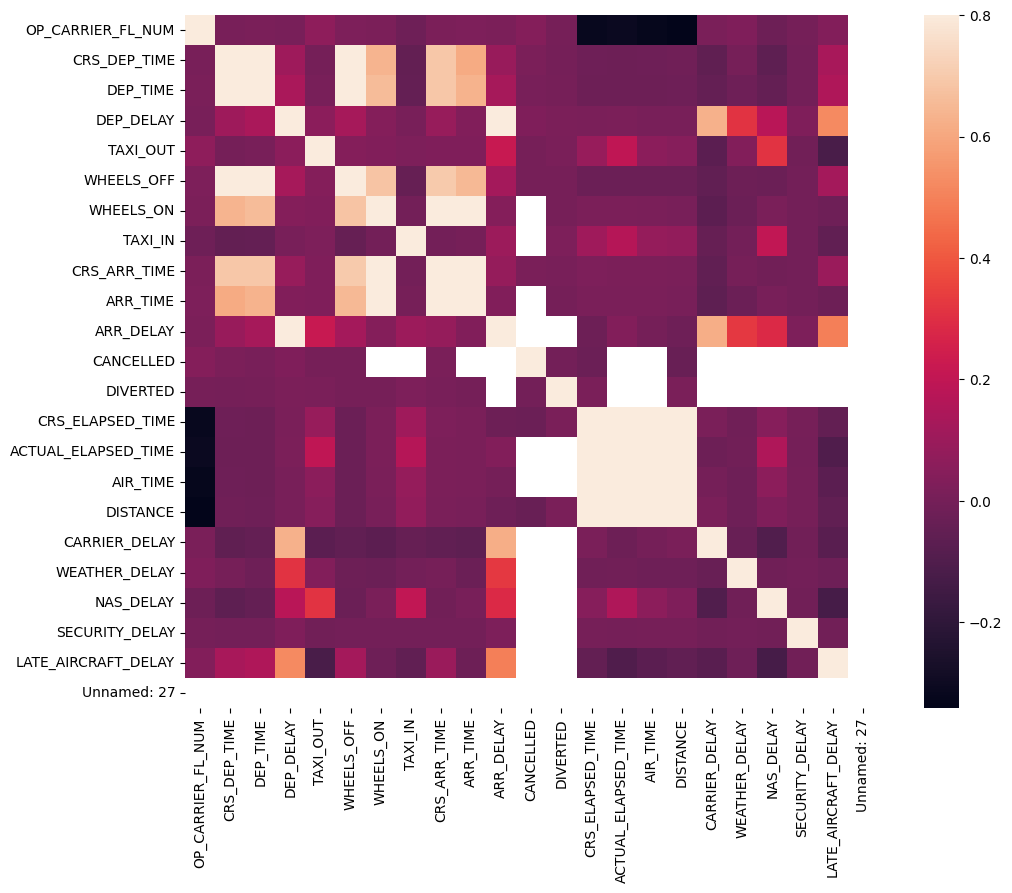

CPU times: user 2min 24s, sys: 30.2 s, total: 2min 55s
Wall time: 1min 58s


In [9]:
%%time
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = ddf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels=corrmat.columns, yticklabels=corrmat.columns);
plt.show()

Through the correlation matrix, we can see how some of the 23 variables in the dataset present multicollinearity, which can be linearly predicted from the others. In order to have a better analysis and qork qith a lighter dataset, we are going to delete some of those unwanted variables.

In [10]:
%%time
ddf['FL_DATE'] = ddf['FL_DATE'].astype('datetime64[ns]')
ddf.dtypes

CPU times: user 19.2 ms, sys: 0 ns, total: 19.2 ms
Wall time: 21.8 ms


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [11]:
%%time
ddf.shape[0].compute()

CPU times: user 34.5 s, sys: 2.52 s, total: 37 s
Wall time: 23.9 s


7213446

In [12]:
%%time
#create new column Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

# Create a new column to represent the status of the flight
ddf['STATUS'] = ddf['ARR_DELAY'].apply(lambda x: 0 if x <= 15 else 1 if x <= 30 else 2 if x <= 60 else 3 if x <= 120 else 4)


CPU times: user 20.5 ms, sys: 0 ns, total: 20.5 ms
Wall time: 30.2 ms


/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:4419: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('ARR_DELAY', 'int64'))

  warnings.warn(meta_warning(meta))


Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.

In [13]:
%%time
# change the cancellation code to numeric

ddf['CANCELLATION_CODE'].replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3])


CPU times: user 3.16 ms, sys: 0 ns, total: 3.16 ms
Wall time: 4.15 ms


Dask Series Structure:
npartitions=13
    object
       ...
     ...  
       ...
       ...
Name: CANCELLATION_CODE, dtype: object
Dask Name: replace, 9 graph layers

In [14]:
ddf = ddf.drop("DEP_DELAY",1)
ddf = ddf.drop("ARR_TIME",1)
ddf = ddf.drop("CRS_ARR_TIME",1)
ddf = ddf.drop("ACTUAL_ELAPSED_TIME",1)
ddf = ddf.drop("CRS_ELAPSED_TIME",1)
ddf = ddf.drop("DIVERTED",1)
ddf = ddf.drop("CANCELLED",1)
ddf = ddf.drop("DISTANCE",1)
ddf = ddf.drop("OP_CARRIER_FL_NUM",1)
ddf = ddf.drop("Unnamed: 27",1) #Empty

In [15]:
%%time
ddf.head(20)

CPU times: user 3.58 s, sys: 299 ms, total: 3.88 s
Wall time: 4.26 s


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLATION_CODE,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,STATUS
0,2018-01-01,UA,EWR,DEN,1517,1512.0,15.0,1527.0,1712.0,10.0,-23.0,NaN,225.0,NaN,NaN,NaN,NaN,NaN,0
1,2018-01-01,UA,LAS,SFO,1115,1107.0,11.0,1118.0,1223.0,7.0,-24.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,0
2,2018-01-01,UA,SNA,DEN,1335,1330.0,15.0,1345.0,1631.0,5.0,-13.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN,0
3,2018-01-01,UA,RSW,ORD,1546,1552.0,19.0,1611.0,1748.0,6.0,-2.0,NaN,157.0,NaN,NaN,NaN,NaN,NaN,0
4,2018-01-01,UA,ORD,ALB,630,650.0,13.0,703.0,926.0,10.0,14.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,0
5,2018-01-01,UA,ORD,OMA,2241,2244.0,15.0,2259.0,1.0,2.0,-11.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,0
6,2018-01-01,UA,IAH,LAS,750,747.0,14.0,801.0,854.0,6.0,-16.0,NaN,173.0,NaN,NaN,NaN,NaN,NaN,0
7,2018-01-01,UA,DEN,CID,1324,1318.0,11.0,1329.0,1554.0,6.0,-19.0,NaN,85.0,NaN,NaN,NaN,NaN,NaN,0
8,2018-01-01,UA,SMF,EWR,2224,2237.0,10.0,2247.0,627.0,9.0,-2.0,NaN,280.0,NaN,NaN,NaN,NaN,NaN,0
9,2018-01-01,UA,RIC,DEN,1601,1559.0,12.0,1611.0,1748.0,8.0,-17.0,NaN,217.0,NaN,NaN,NaN,NaN,NaN,0


## Exploratory Analysis and Visualization

**1. Summarize the flights** - We will see the percentage of flights that have delayed and cancelled.



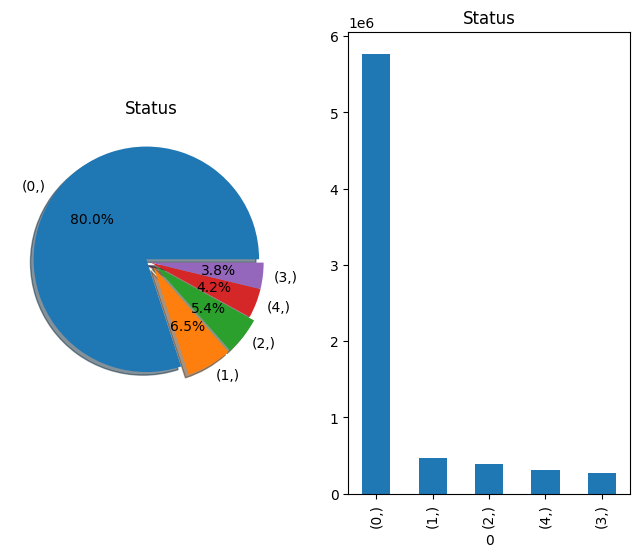

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
CPU times: user 1min 27s, sys: 9.5 s, total: 1min 36s
Wall time: 1min 9s


In [16]:
%%time
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(50,30))
pd.DataFrame(ddf['STATUS']).value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
pd.DataFrame(ddf['STATUS']).value_counts().plot.bar(figsize=(8,6), ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

In 2008, 11.9% of domestic flights in the US were delayed by more than 15 minutes. 5.4% of total flights had delays of more than one hour. Another different interpretation is that 80% of flights are on time. Besides, 3.8% of flights is diverted and 4.2% of flights is cancelled.

**2. Cancelled flights** - We are going to investigate the relationship of cancelled flights and the reason behind. We will view the result of analysis through graph by visualization.

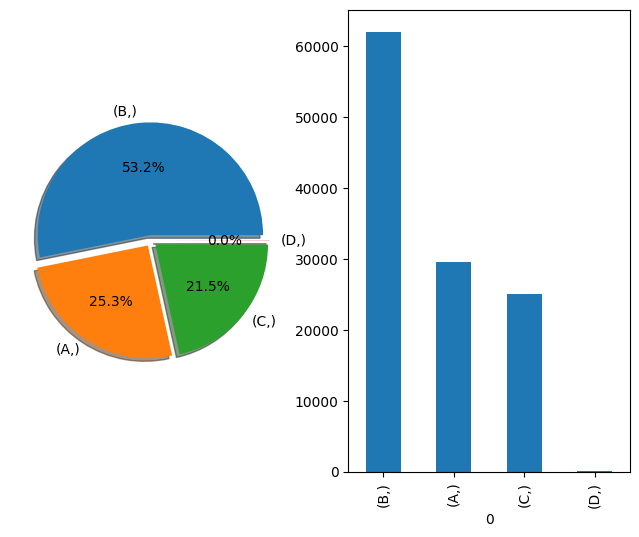

A = carrier, B = weather, C = NAS, D=security
CPU times: user 1min 27s, sys: 8.58 s, total: 1min 35s
Wall time: 1min 8s


In [17]:
%%time
CancFlights = ddf[(ddf.STATUS == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
pd.DataFrame(CancFlights['CANCELLATION_CODE']).value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
pd.DataFrame(CancFlights['CANCELLATION_CODE']).value_counts().plot.bar(figsize=(8,6), ax=ax[1])
plt.show()


print('A = carrier, B = weather, C = NAS, D=security')

From the pie chart above, we can see that weather delay has the most among all, which 53.2% of flight cancelled due to weather factor. Besides, 25.3% of flights cancelled due to carrier factor and 21.5% of flights cancelled due to NAS.

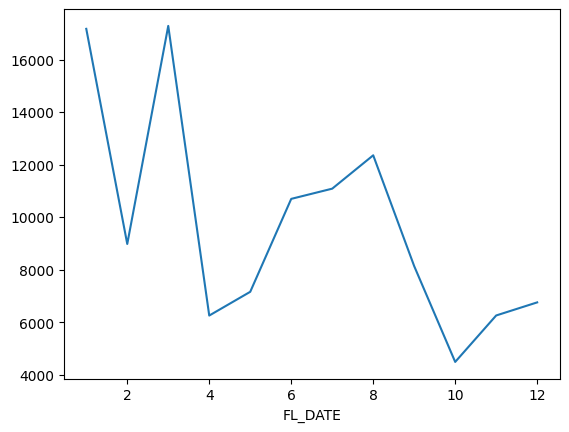

CPU times: user 45.7 s, sys: 8.02 s, total: 53.7 s
Wall time: 40.9 s


In [18]:
%%time
import datetime as dt
CancFlights = ddf[(ddf.STATUS == 4)]
#CancFlights['FL_DATE'] = pd.to_datetime(CancFlights['FL_DATE'])
CancFlights['CANCELLATION_CODE'].groupby(CancFlights['FL_DATE'].dt.month).count().compute().plot()
plt.show()

As we can see in graph above, the first three months (from January to March) have the peak of flights being cancelled in 2018. Escpecially in January, with the winter weather comes with ice storm might affect the flight flying completion time. The bad weather might actually be the reason behind all the cancellations, since for the rest of the year does not appear such a high peak of cancellation. The compounded effect of the flights cancelled affect other programmed flights down the lane.

**3. Delayed flights** - We will explore the facts and insights about the delayed flights

In [19]:
%%time
Delayedflights = ddf[(ddf.STATUS >= 1) &(ddf.STATUS < 3)]

CPU times: user 4.72 ms, sys: 0 ns, total: 4.72 ms
Wall time: 4.73 ms


<timed exec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



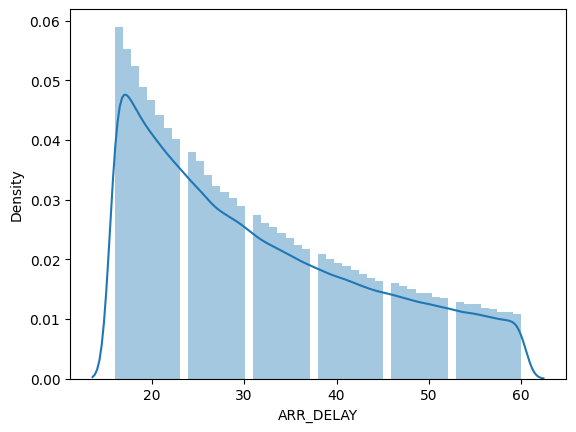

CPU times: user 48.7 s, sys: 5.52 s, total: 54.2 s
Wall time: 39.6 s


In [20]:
%%time
#histogram
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()

What can be seen on the histogram, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short.

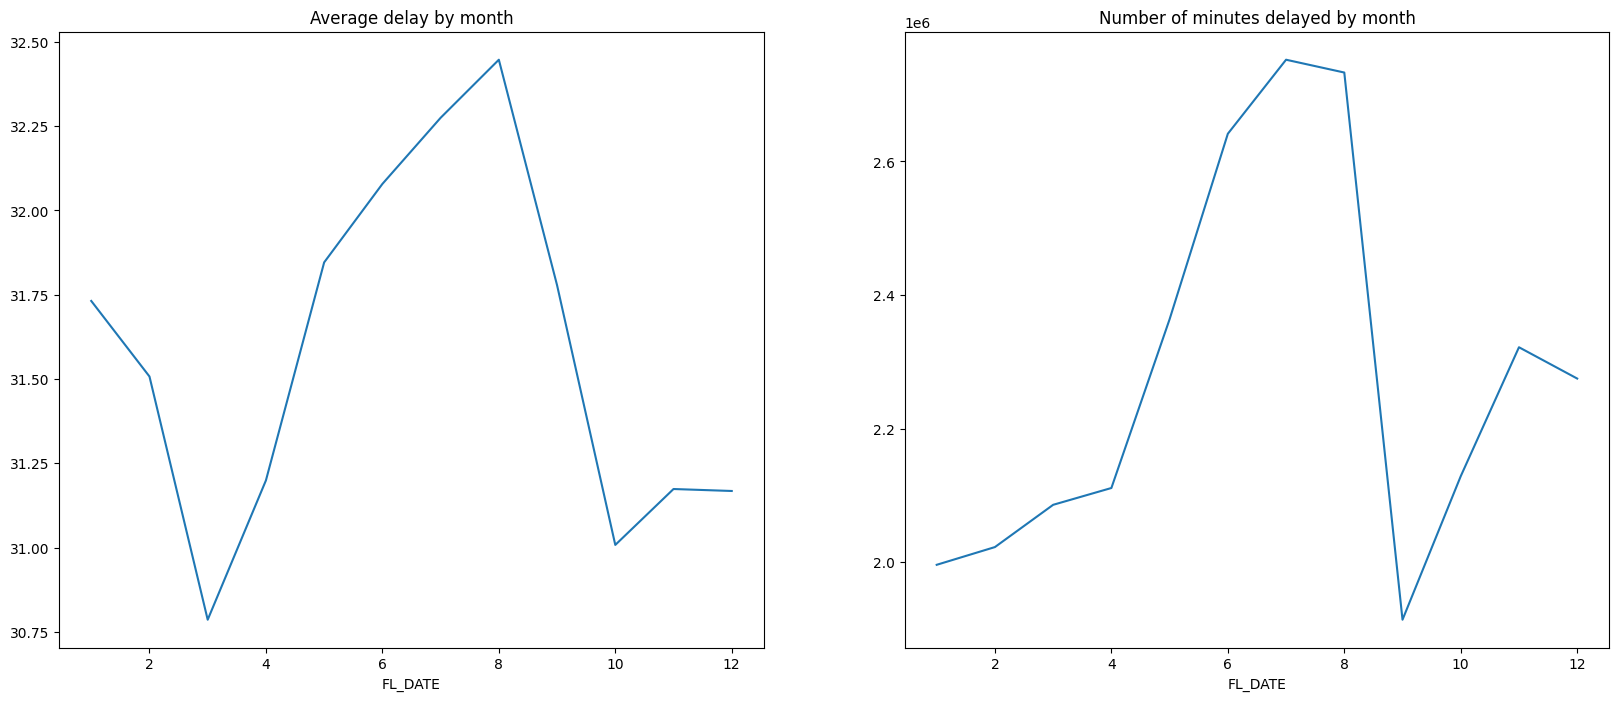

CPU times: user 1min 29s, sys: 9.24 s, total: 1min 38s
Wall time: 1min 11s


In [21]:
%%time
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights['ARR_DELAY'].groupby(Delayedflights['FL_DATE'].dt.month).mean().compute().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights['ARR_DELAY'].groupby(Delayedflights['FL_DATE'].dt.month).sum().compute().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

Delays focused on May to October, with the peak on average delays on August 2018.

**4. Delay reasons** - We will going to explore the causes of flights delays.

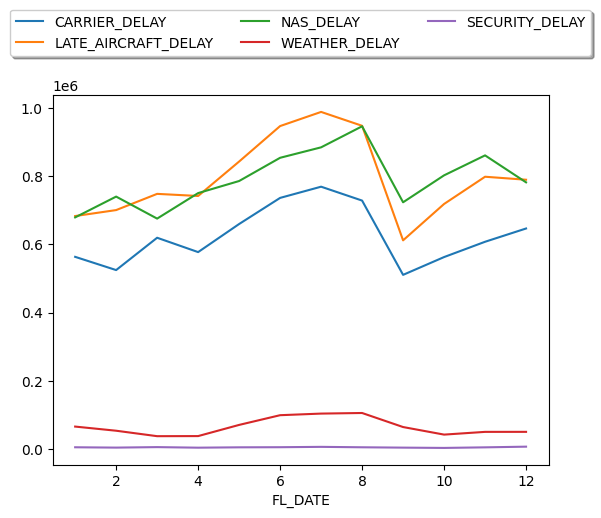

CPU times: user 46.7 s, sys: 5.09 s, total: 51.8 s
Wall time: 37.1 s


In [22]:
%%time
df2 = Delayedflights.compute().filter(['FL_DATE','CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY'], axis=1)
df2 = df2.groupby(df2['FL_DATE'].dt.month)['CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

**5. Relationship between variables** - We will going to explore the relationships between thses variables, especially on the causes of the dalayed flights.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


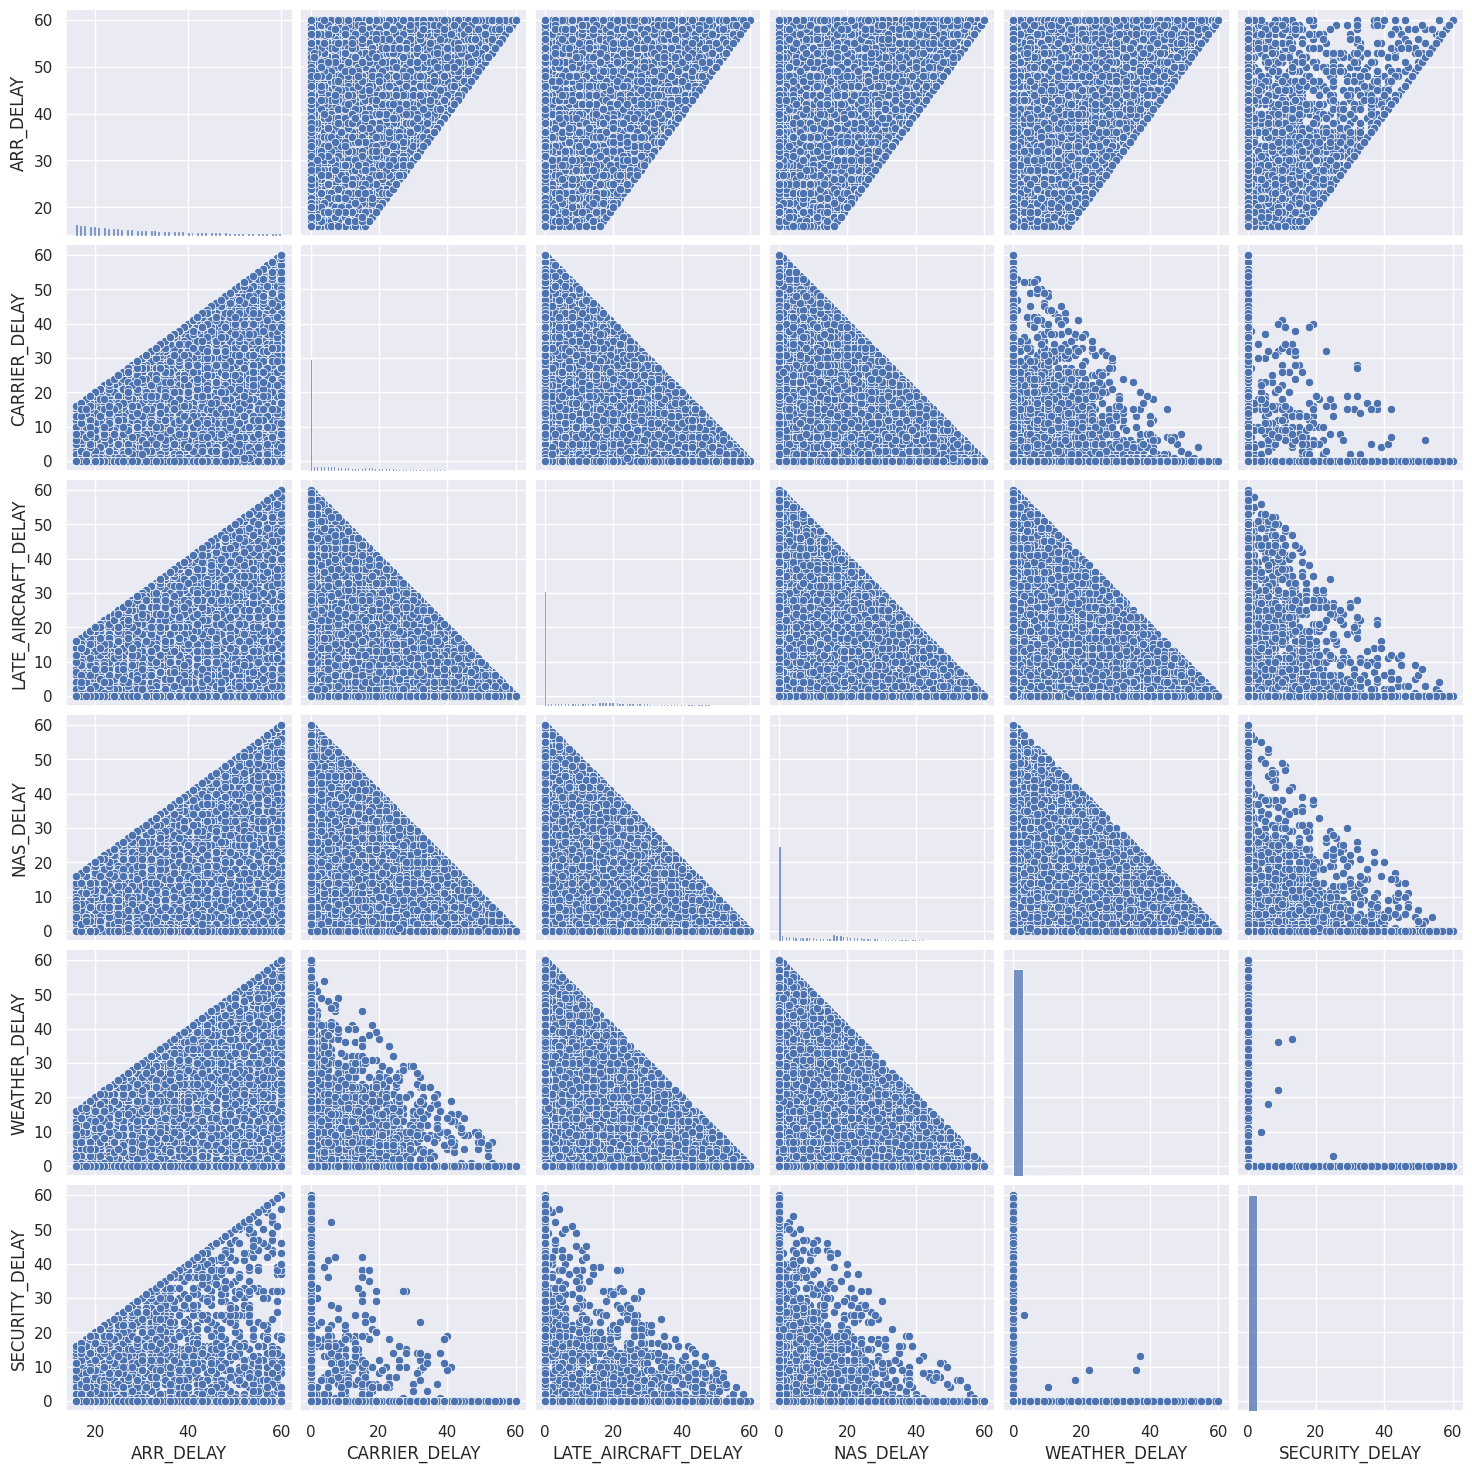

CPU times: user 1min 59s, sys: 5.39 s, total: 2min 4s
Wall time: 1min 51s


In [23]:
%%time
#scatterplot
sns.set()
cols = ['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY']
delay_pd = Delayedflights[cols].compute()
sns.pairplot(delay_pd, size = 2.5)
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [24]:
%%time
ddf['OP_CARRIER'].value_counts().compute()

CPU times: user 49.2 s, sys: 5.95 s, total: 55.2 s
Wall time: 42.3 s


WN    1352552
DL     949283
AA     916818
OO     774137
UA     621565
YX     316090
B6     305010
MQ     296001
OH     278457
9E     245917
AS     245761
YV     215138
EV     202890
NK     176178
F9     120035
G4      96221
HA      83723
VX      17670
Name: OP_CARRIER, dtype: int64

CPU times: user 47.6 s, sys: 5.41 s, total: 53 s
Wall time: 40.1 s


Text(0.5, 1.0, 'Delay Distribution by Carrier')

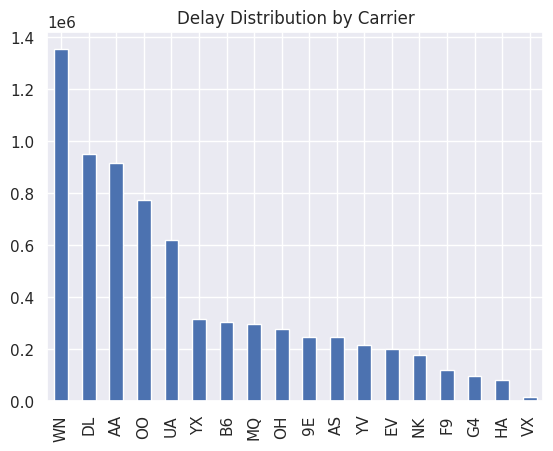

In [25]:
%%time
ddf['OP_CARRIER'].value_counts().compute().plot.bar()
plt.title('Delay Distribution by Carrier')

## Asking and Answering Questions

Exploratory Data Analysis (EDA) involves asking meaningful questions about the dataset and answering them through data exploration. This iterative process helps uncover patterns, trends, and insights. The questions asked guide the analysis, and the answers contribute to a deeper understanding of the dataset.


#### Q1: What percentage of flights experienced delays or cancellations?

In [26]:
%%time
import dask.dataframe as dd

# Calculate the percentage of delayed flights
delayed_percentage = (ddf['ARR_DELAY'].notnull().sum() / len(ddf)).compute() * 100

# Calculate the percentage of cancelled flights
cancelled_percentage = (ddf['CANCELLATION_CODE'].notnull().sum() / len(ddf)).compute() * 100

print(f"Percentage of delayed flights: {delayed_percentage:.2f}%")
print(f"Percentage of cancelled flights: {cancelled_percentage:.2f}%")


Percentage of delayed flights: 98.10%
Percentage of cancelled flights: 1.62%
CPU times: user 3min 12s, sys: 21.1 s, total: 3min 33s
Wall time: 2min 38s


#### Q2: How do taxi-out and taxi-in times relate to overall delays?

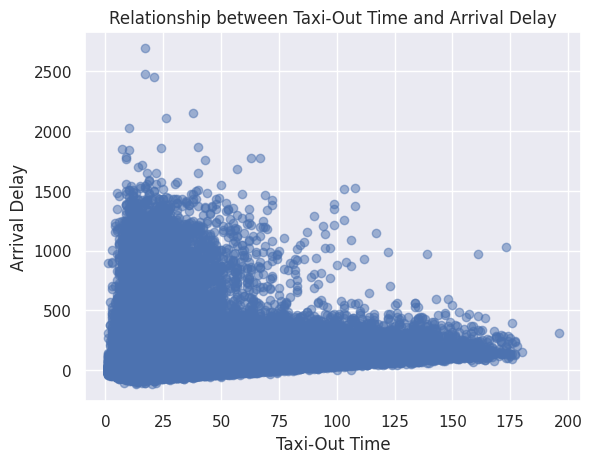

CPU times: user 1min 55s, sys: 14 s, total: 2min 9s
Wall time: 1min 48s


In [27]:
%%time
# Scatter plot to analyze the relationship between taxi-out time and arrival delay
plt.scatter(ddf['TAXI_OUT'].compute(), ddf['ARR_DELAY'].compute(), alpha=0.5)
plt.xlabel('Taxi-Out Time')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Taxi-Out Time and Arrival Delay')
plt.show()

> This scatter plot graph explores the relationship between taxi-out time and arrival delay, providing insights into potential correlations.

#### Q3: Are there specific months or seasons when flight cancellations are more frequent?

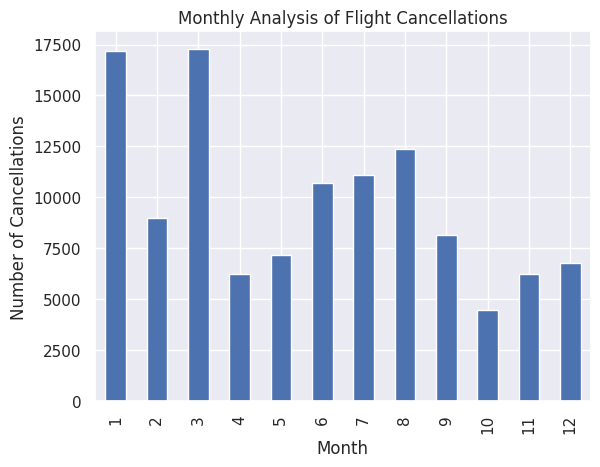

CPU times: user 47 s, sys: 6.51 s, total: 53.5 s
Wall time: 39.7 s


In [28]:
%%time
ddf['Month'] = ddf['FL_DATE'].dt.month

# Count the number of cancellations per month
cancellations_by_month = ddf['CANCELLATION_CODE'].notnull().groupby(ddf['Month']).sum()

# Plot the results
cancellations_by_month.compute().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Monthly Analysis of Flight Cancellations')
plt.show()

> Based on the analysis, the bar plot reveals that the month of January and March exhibits the highest frequency of flight cancellations. This indicates that, in the given dataset, January and March experiences a notable number of flight cancellations compared to other months.

#### Q4: Do delays vary between daytime and nighttime flights?

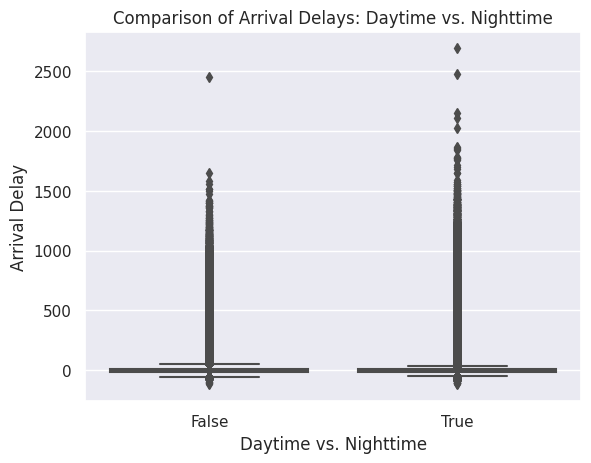

CPU times: user 49.6 s, sys: 8 s, total: 57.6 s
Wall time: 42.8 s


In [29]:
%%time
ddf['Daytime'] = (ddf['CRS_DEP_TIME'] >= 600) & (ddf['CRS_DEP_TIME'] < 1800)

# Create a boxplot to compare delays during daytime and nighttime
sns.boxplot(x='Daytime', y='ARR_DELAY', data=ddf.compute())
plt.xlabel('Daytime vs. Nighttime')
plt.ylabel('Arrival Delay')
plt.title('Comparison of Arrival Delays: Daytime vs. Nighttime')
plt.show()


#### Q5: Is there a correlation between the air time of a flight and the arrival delay?

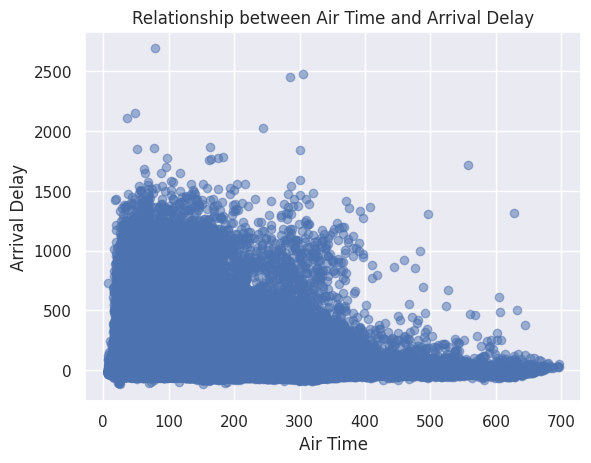

CPU times: user 1min 51s, sys: 10.4 s, total: 2min 1s
Wall time: 1min 34s


In [30]:
%%time
# Scatter plot to analyze the relationship between air time and arrival delay
plt.scatter(ddf['AIR_TIME'].compute(), ddf['ARR_DELAY'].compute(), alpha=0.5)
plt.xlabel('Air Time')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Air Time and Arrival Delay')
plt.show()


#### Q6: At what times of the day do delays occur most frequently?

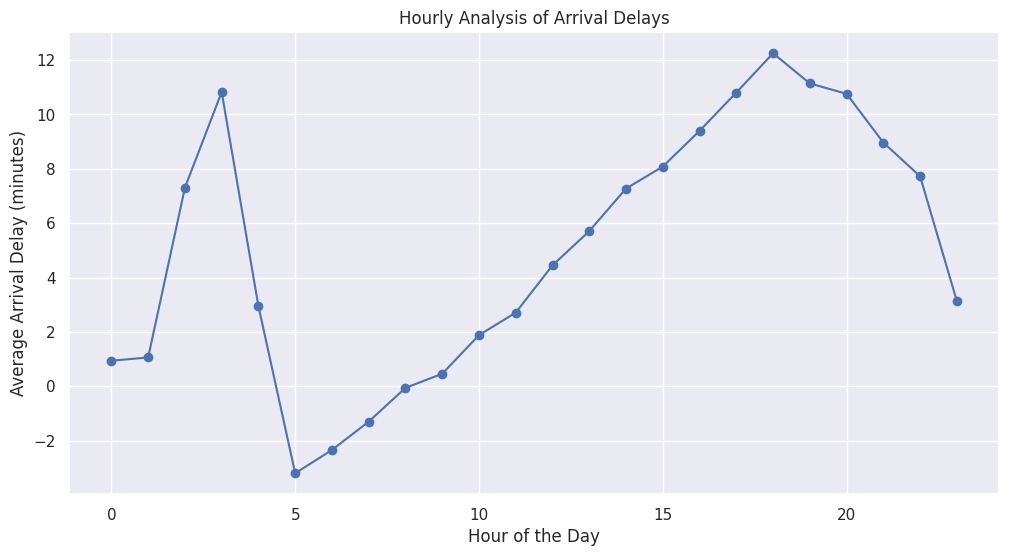

CPU times: user 47.3 s, sys: 4.82 s, total: 52.1 s
Wall time: 37.6 s


In [31]:
%%time
# Extract the hour from the scheduled departure time
ddf['Hour'] = ddf['CRS_DEP_TIME'] // 100

# Group by hour and calculate the average arrival delay
average_delay_by_hour = ddf.groupby('Hour')['ARR_DELAY'].mean().compute()

# Plotting
plt.figure(figsize=(12, 6))
average_delay_by_hour.plot(marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Hourly Analysis of Arrival Delays')
plt.show()


> This code analyzes the average arrival delays for each hour of the day and visualizes the trends using a line plot. It shows that 15-20 hour of the day have the highest average arrival delay.

## Inferences and Conclusion


After we conducting EDA and asking questions throught the dataset on flights delay reveals a nuanced and multifaceted landscape within the aviation industry. Through the examination of various factors influencing delays. Flight delays stem from a diverse set of contributors, including weather conditions, carrier factors, NAS, and security delays. EDA highlights temporal patterns, indicating specific times or seasons when delays are more prevalent.

- Understanding these peaks can infom airlines, airports , and passengers, enabling better preparation and potentially mitigating the impacts of delays.
- For weather factor, the dominant influence of weather in flight delays emphasizes the need for adaptive strategies. Proactive measures, such as improved weather forecasting, contingency planning, and enhanced commincation during adverse conditions. can caontribute to minimizing disruptions.
- Delays related to security measures and policies underline the delicate balance between safety and operational efficiency. Continuous efforts to refine security procedures, coupled with a keen understanding of their impact on travel timelines, are crucial for maintaining a secure yet efficient aviation environment.

In conclusion, Exploratory Data Analysis of flight delays provides valuable insights into the intricacies of air travel. Recognizing the interplay of factors, from weather conditions to operational practices, facilitates a holistic approach toward enhancing the resilience and efficiency of the aviation industry. By leveraging these insights, stakeholders can work collaboratively to implement targeted improvements, fostering a more reliable and punctual air travel experience for passengers worldwide.








## References and Future Work

Through out this assignment using Dask to conduct EDA abut the dataset on flight delay analysis, we can conclude Dask is scalable, efficient which give enlightening and transformative experience.
- **Efficiency**

  The efficiency gains achieved through Dask's parallel processing have significantly accelerated data manipulation and exploration tasks. This not only expedites the EDA process but also allows for a more iterative and interactive exploration, fostering a deeper understanding of the dataset.
- **Flexibility**

  Dask's flexibility in seamlessly integrating with popular data science libraries, such as Pandas and Numpy, ensures a smooth transition for analysts familiar with these tools. The adaptability of Dask to diverse computing environments enhances its utility, whether employed on a local machine or scaled up for cloud-based analyses.

In conclusion, the journey through flight delay dataset exploration using Dask has not only facilitated a more efficient and scalable analysis but has also opened doors to a new era of collaborative and dynamic data exploration. As we conclude this exploration, the lessons learned and insights gained pave the way for future endeavors, armed with the power of Dask to navigate the complexities of data-driven discovery in the realm of aviation analytics.


#### Reference sources
- [Dask DataFrame](https://docs.dask.org/en/stable/)
- [Exploratory Data Analysis Using Dask](https://medium.com/analytics-vidhya/exploratory-data-analysis-using-dask-b145417c029a)
- [Visulization - Dask.DataFrame](https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.visualize.html)





